In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import math

In [2]:
folder = "/mnt/d/donkeycar_model/"
models = list(os.listdir(folder))
print(models)

['pictures', 'PPO', 'PPO2', 'PPO3', 'PPO4', 'SAC', 'SAC2', 'SAC3', 'TD3', 'videos']


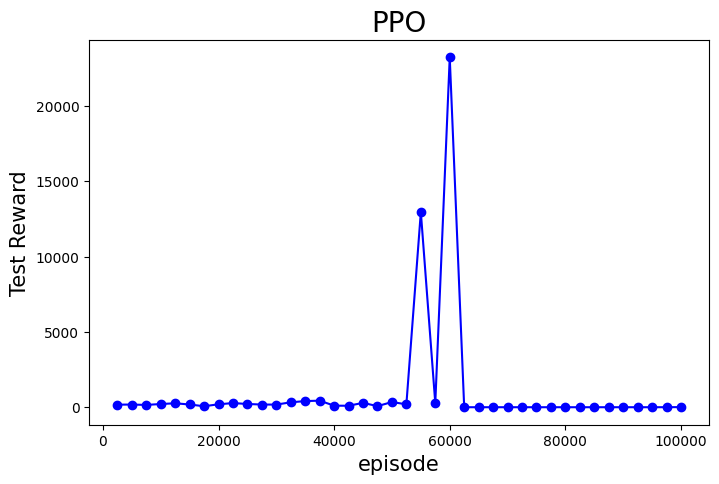

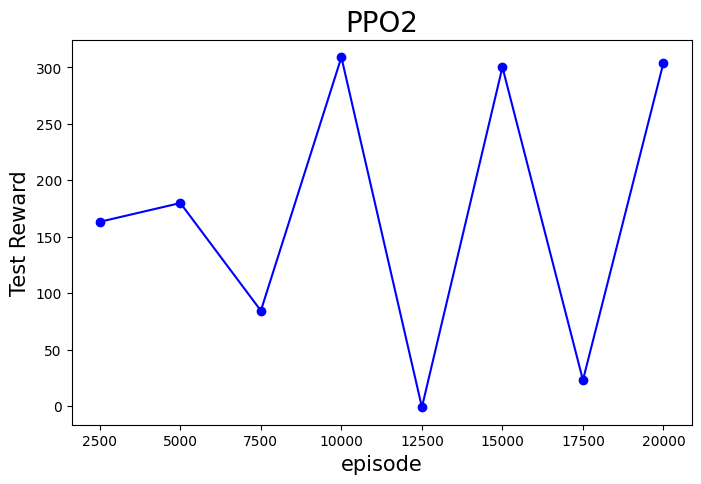

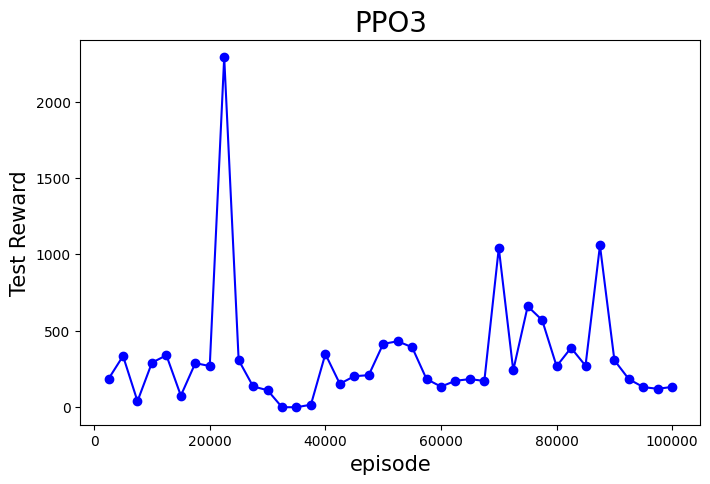

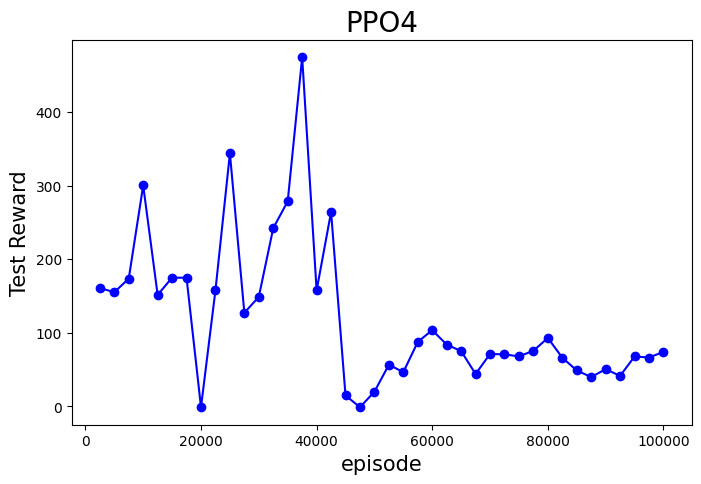

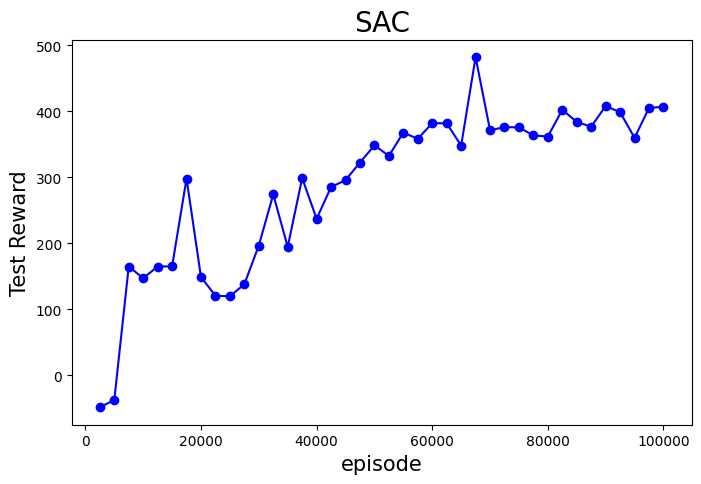

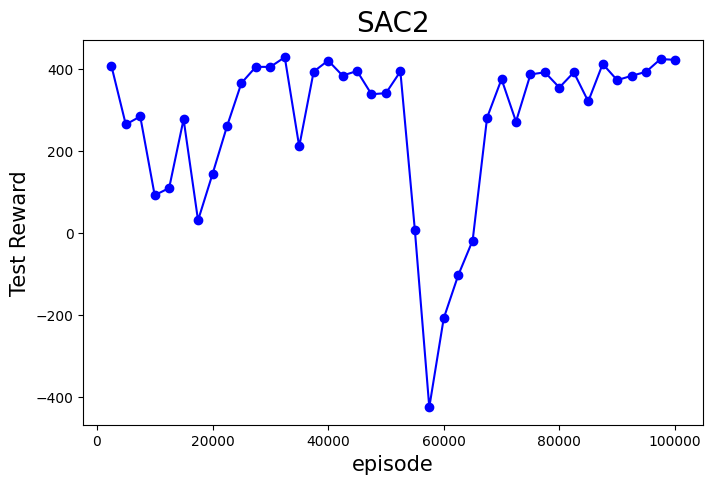

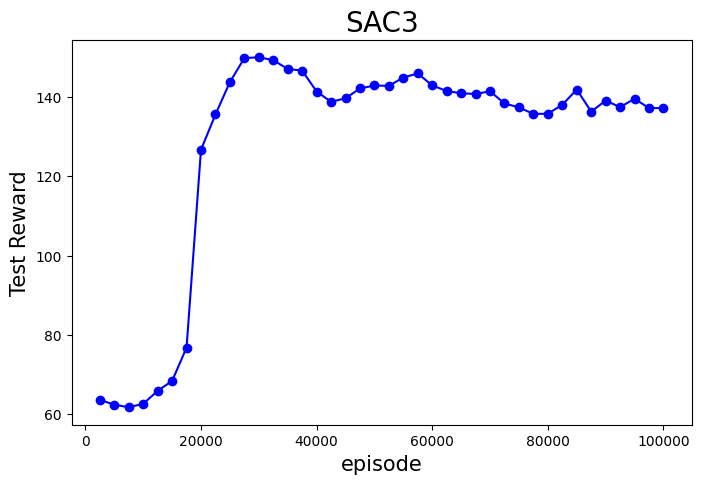

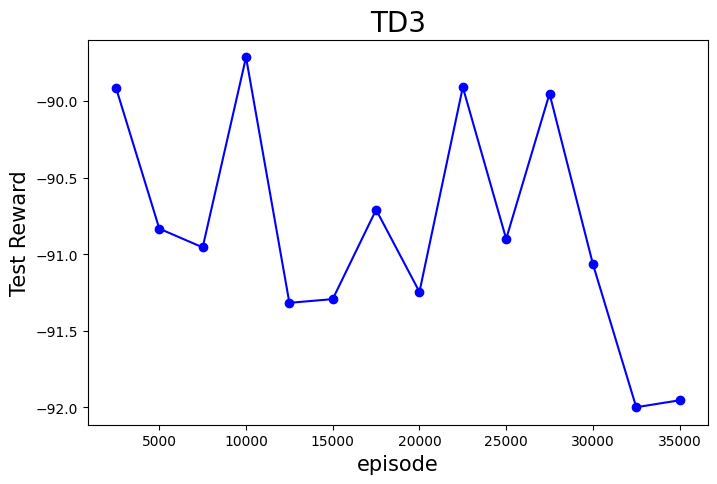

In [5]:
for m in models:
    if m == "pictures" or m == "videos": continue
    os.chdir(folder + m)
    num = min( int((math.floor(len(os.listdir(os.getcwd()))/2))*2500), 100000 )
    if m == "SAC2": directory = os.getcwd() + f'/Log_SAC-{num}.npy'
    else: directory = os.getcwd() + f'/Log_{m}-{num}.npy'
    # print(dir)
    Log = np.load(directory, allow_pickle=True).item()
    TestReward = Log["TestReward"]
    plt.figure(figsize=(8,5)) #設定繪圖區大小
    plt.title(m,fontsize=20)
    plt.xlabel("episode",fontsize=15)
    plt.ylabel("Test Reward",fontsize=15)
    episode = []
    for i in range(len(TestReward)): 
        episode.append((i+1)*2500)
    plt.plot(episode, TestReward, "bo-")
    plt.savefig(f'{folder}pictures/{m}.png')